In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:

!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle (2).json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:14<00:00, 226MB/s]
100% 2.04G/2.04G [00:15<00:00, 142MB/s]


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']


In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


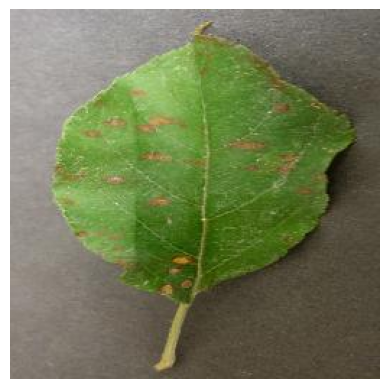

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 64

In [ ]:
# # Step 1: CURATE dataset (run this ONCE before training)
# import os
# import random
# import shutil

# original_dataset_dir = 'plantvillage dataset/color'
# curated_dataset_dir = 'plantvillage_curated'

# train_dir = os.path.join(curated_dataset_dir, 'train')
# val_dir = os.path.join(curated_dataset_dir, 'val')
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

# min_required = 1000

# for class_name in os.listdir(original_dataset_dir):
#     class_path = os.path.join(original_dataset_dir, class_name)
#     if not os.path.isdir(class_path):
#         continue

#     images = os.listdir(class_path)
#     if len(images) < min_required:
#         continue

#     # Take 1000 images
#     selected = random.sample(images, 1000)
#     train_imgs = selected[:800]
#     val_imgs = selected[800:]

#     train_class_dir = os.path.join(train_dir, class_name)
#     val_class_dir = os.path.join(val_dir, class_name)
#     os.makedirs(train_class_dir, exist_ok=True)
#     os.makedirs(val_class_dir, exist_ok=True)

#     for img in train_imgs:
#         shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
#     for img in val_imgs:
#         shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))

# print("✅ Dataset curation completed.")


import os
import random
import shutil

original_dataset_dir = 'plantvillage dataset/color'
curated_dataset_dir = 'plantvillage_curated'

train_dir = os.path.join(curated_dataset_dir, 'train')
val_dir = os.path.join(curated_dataset_dir, 'val')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

min_images = 900
max_images = 1200

for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    num_images = len(images)

    # Keep only classes with 900 to 1200 images
    if num_images < min_images or num_images > max_images:
        continue

    # Shuffle and sample up to 1000 images
    selected = random.sample(images, min(1000, num_images))
    train_split = int(0.8 * len(selected))
    train_imgs = selected[:train_split]
    val_imgs = selected[train_split:]

    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))

print("✅ Dataset curation completed. Only classes with 900–1200 images were included.")


✅ Dataset curation completed. Only classes with 900–1200 images were included.


In [ ]:
curated_classes = []

for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    num_images = len(images)

    if 900 <= num_images <= 1200:
        curated_classes.append((class_name, num_images))

# Sort by class name for clean output
curated_classes.sort()

print("\n✅ Curated Classes:")
for class_name, count in curated_classes:
    print(f"{class_name}: {count} images")

print(f"\nTotal curated classes: {len(curated_classes)}")



✅ Curated Classes:
Cherry_(including_sour)___Powdery_mildew: 1052 images
Corn_(maize)___Common_rust_: 1192 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Corn_(maize)___healthy: 1162 images
Grape___Black_rot: 1180 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 images
Pepper,_bell___Bacterial_spot: 997 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Strawberry___Leaf_scorch: 1109 images
Tomato___Early_blight: 1000 images
Tomato___Leaf_Mold: 952 images

Total curated classes: 12


In [ ]:
import os
from collections import Counter

# For training set
train_counts = Counter(train_generator.classes)
print("Training Images per Class:")
for class_index, count in sorted(train_counts.items()):
    class_name = list(train_generator.class_indices.keys())[class_index]
    print(f"{class_name}: {count}")

print("\n" + "-"*40)

# For validation set
val_counts = Counter(val_generator.classes)
print("Validation Images per Class:")
for class_index, count in sorted(val_counts.items()):
    class_name = list(val_generator.class_indices.keys())[class_index]
    print(f"{class_name}: {count}")


NameError: name 'train_generator' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.image as mpimg

# Image Parameters
img_size = 224
batch_size = 64
base_dir = 'plantvillage_curated'

# Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train Generator
train_generator = data_gen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Validation Generator
val_generator = data_gen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# CNN Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Found 10634 images belonging to 12 classes.
Found 3209 images belonging to 12 classes.
Epoch 1/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.4748 - loss: 5.7015 - val_accuracy: 0.0622 - val_loss: 71.8793
Epoch 2/15
  1/166 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.6406 - loss: 1.5065

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


166/166 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.6406 - loss: 1.5065 - val_accuracy: 0.0644 - val_loss: 71.4459
Epoch 3/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.6520 - loss: 1.4555 - val_accuracy: 0.1084 - val_loss: 52.5353
Epoch 4/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 37s 225ms/step - accuracy: 0.7812 - loss: 0.9001 - val_accuracy: 0.1069 - val_loss: 51.3917
Epoch 5/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7361 - loss: 1.1088 - val_accuracy: 0.2619 - val_loss: 20.3608
Epoch 6/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 38s 227ms/step - accuracy: 0.7969 - loss: 0.9574 - val_accuracy: 0.2634 - val_loss: 19.0933
Epoch 7/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7874 - loss: 0.7957 - val_accuracy: 0.8594 - val_loss: 0.4306
Epoch 8/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 37s 224ms/step - accuracy: 0.8125 - loss: 0.4888 - val_accuracy: 0.8606 - val_loss: 0.4370
Epoch 9/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 209s 1000ms/step - accuracy: 0.8169 - loss: 0.6740 - va

In [ ]:
model.save("plant_disease.h5")

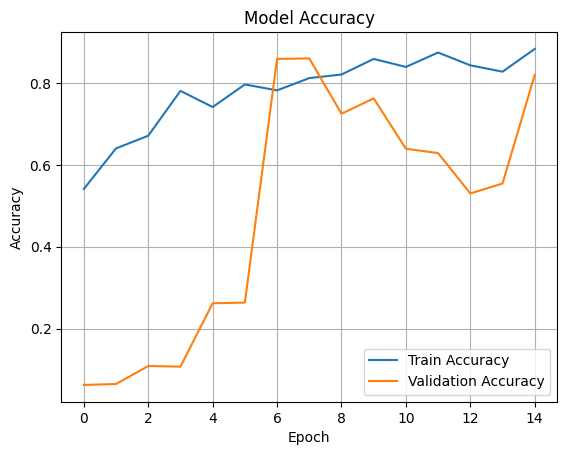

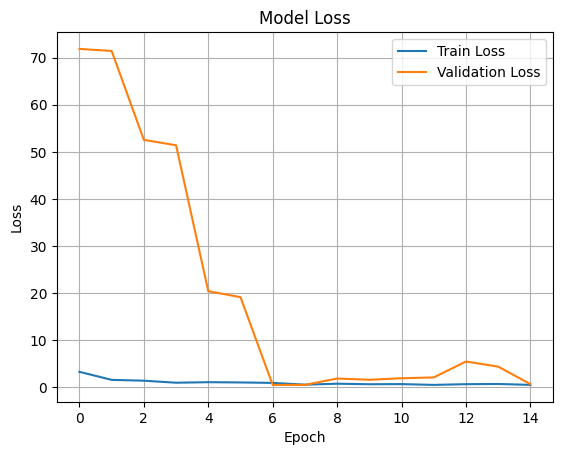

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"✅ Final Validation Accuracy: {val_acc * 100:.2f}%")

51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 772ms/step - accuracy: 0.8733 - loss: 0.4636
✅ Final Validation Accuracy: 81.93%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = 'path_to_your_test_image.jpg'  # Change this to your image path
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize

# Predict probabilities
probabilities = model.predict(img_array)[0]

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Print probabilities for each class
for label, prob in zip(class_labels, probabilities):
    print(f"{label}: {prob:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_test_image.jpg'

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual image path
img_path = '/content/plantvillage_curated/val/Grape___Black_rot/058433ea-b746-42b9-9d69-019a17ddf1a3___FAM_B.Rot 3486.JPG'

# Load and preprocess
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Predict
probabilities = model.predict(img_array)[0]
class_labels = list(train_generator.class_indices.keys())

# Print each class probability
for label, prob in zip(class_labels, probabilities):
    print(f"{label}: {prob:.4f}")

# Optional: Plot probabilities
plt.figure(figsize=(10, 6))
plt.barh(class_labels, probabilities)
plt.xlabel('Probability')
plt.title('Class Probabilities')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/plantvillage_curated/val/Grape___Black_rot/058433ea-b746-42b9-9d69-019a17ddf1a3___FAM_B.Rot 3486.JPG'

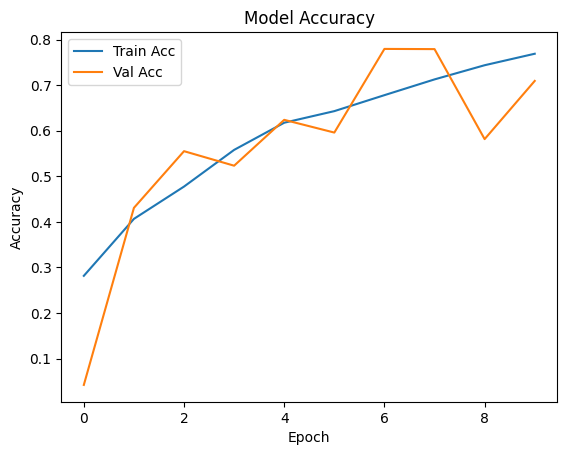

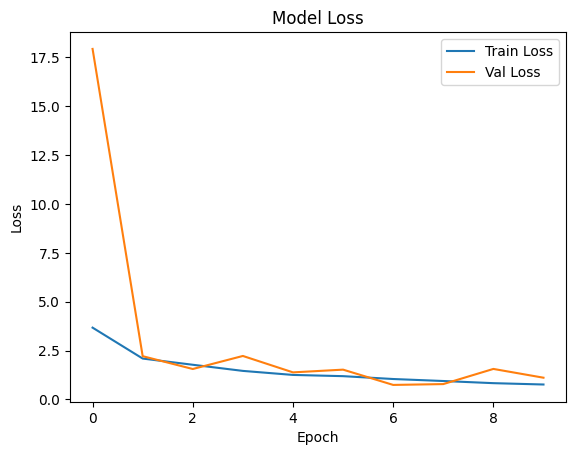

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(val_generator)

# Choose one sample index (e.g., the first image in the batch)
index = 0
sample_image = images[index]
true_label = np.argmax(labels[index])

# Predict probabilities
pred_probs = model.predict(np.expand_dims(sample_image, axis=0))[0]
pred_class = np.argmax(pred_probs)

# Get class labels
class_names = list(val_generator.class_indices.keys())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


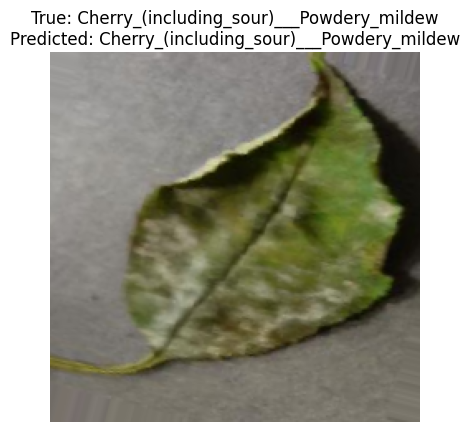

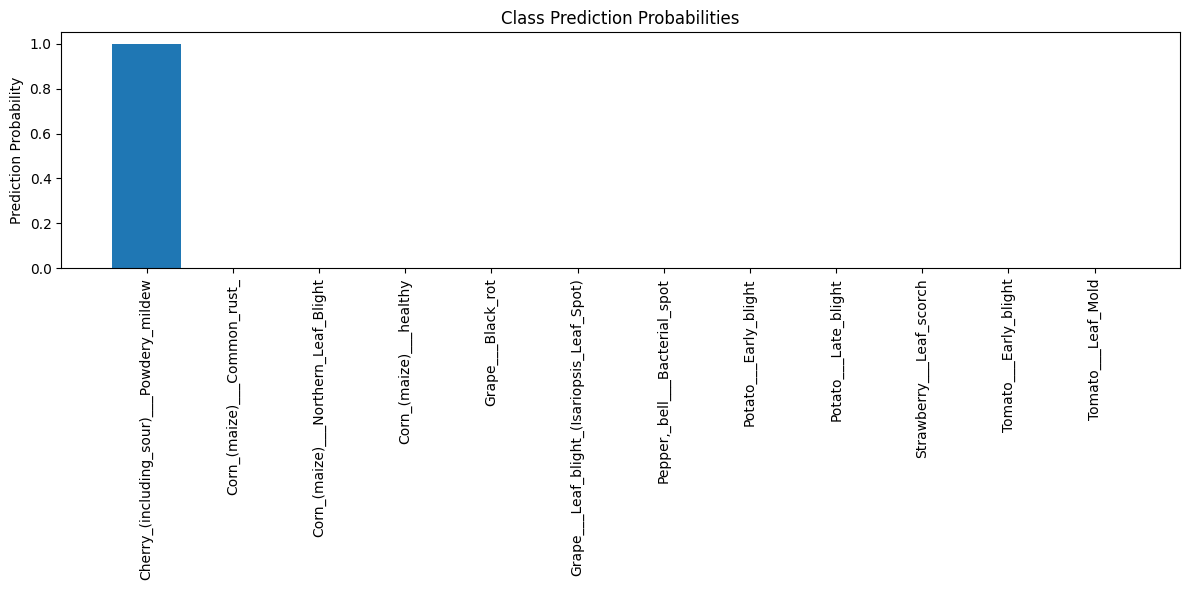

In [ ]:
# Plot the image
plt.imshow(sample_image)
plt.axis('off')
plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[pred_class]}")
plt.show()

# Plot the class probabilities
plt.figure(figsize=(12, 6))
plt.bar(range(len(pred_probs)), pred_probs, tick_label=class_names)
plt.xticks(rotation=90)
plt.ylabel("Prediction Probability")
plt.title("Class Prediction Probabilities")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


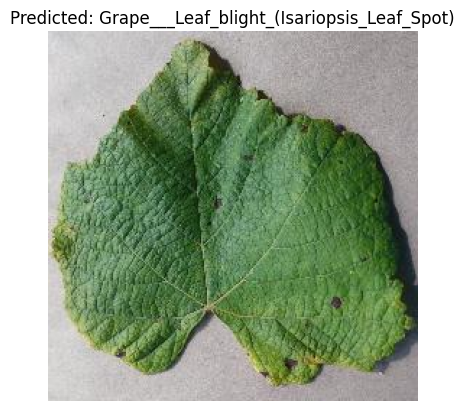

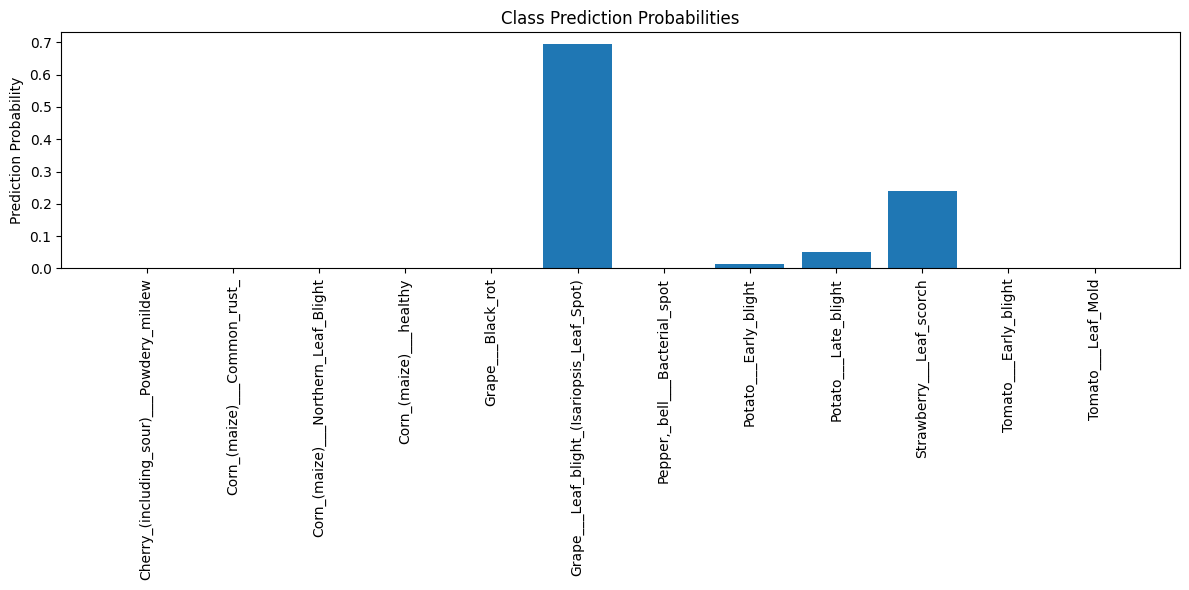

In [ ]:
# Replace this with the actual path to your image
img_path = '/content/plantvillage_curated/val/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/0012e1ee-fde3-478f-ab27-18648feb2b05___FAM_L.Blight 1647.JPG'  # example: 'test_samples/tomato_leaf.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # same normalization as training
img_array = np.expand_dims(img_array, axis=0)
# Predict class probabilities
pred_probs = model.predict(img_array)[0]
pred_class_idx = np.argmax(pred_probs)
class_names = list(train_generator.class_indices.keys())
predicted_class = class_names[pred_class_idx]
# Show the image
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Plot probabilities
plt.figure(figsize=(12, 6))
plt.bar(range(len(pred_probs)), pred_probs, tick_label=class_names)
plt.xticks(rotation=90)
plt.ylabel("Prediction Probability")
plt.title("Class Prediction Probabilities")
plt.tight_layout()
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


<ipython-input-29-371b12dc72eb>:55: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-371b12dc72eb>:55: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


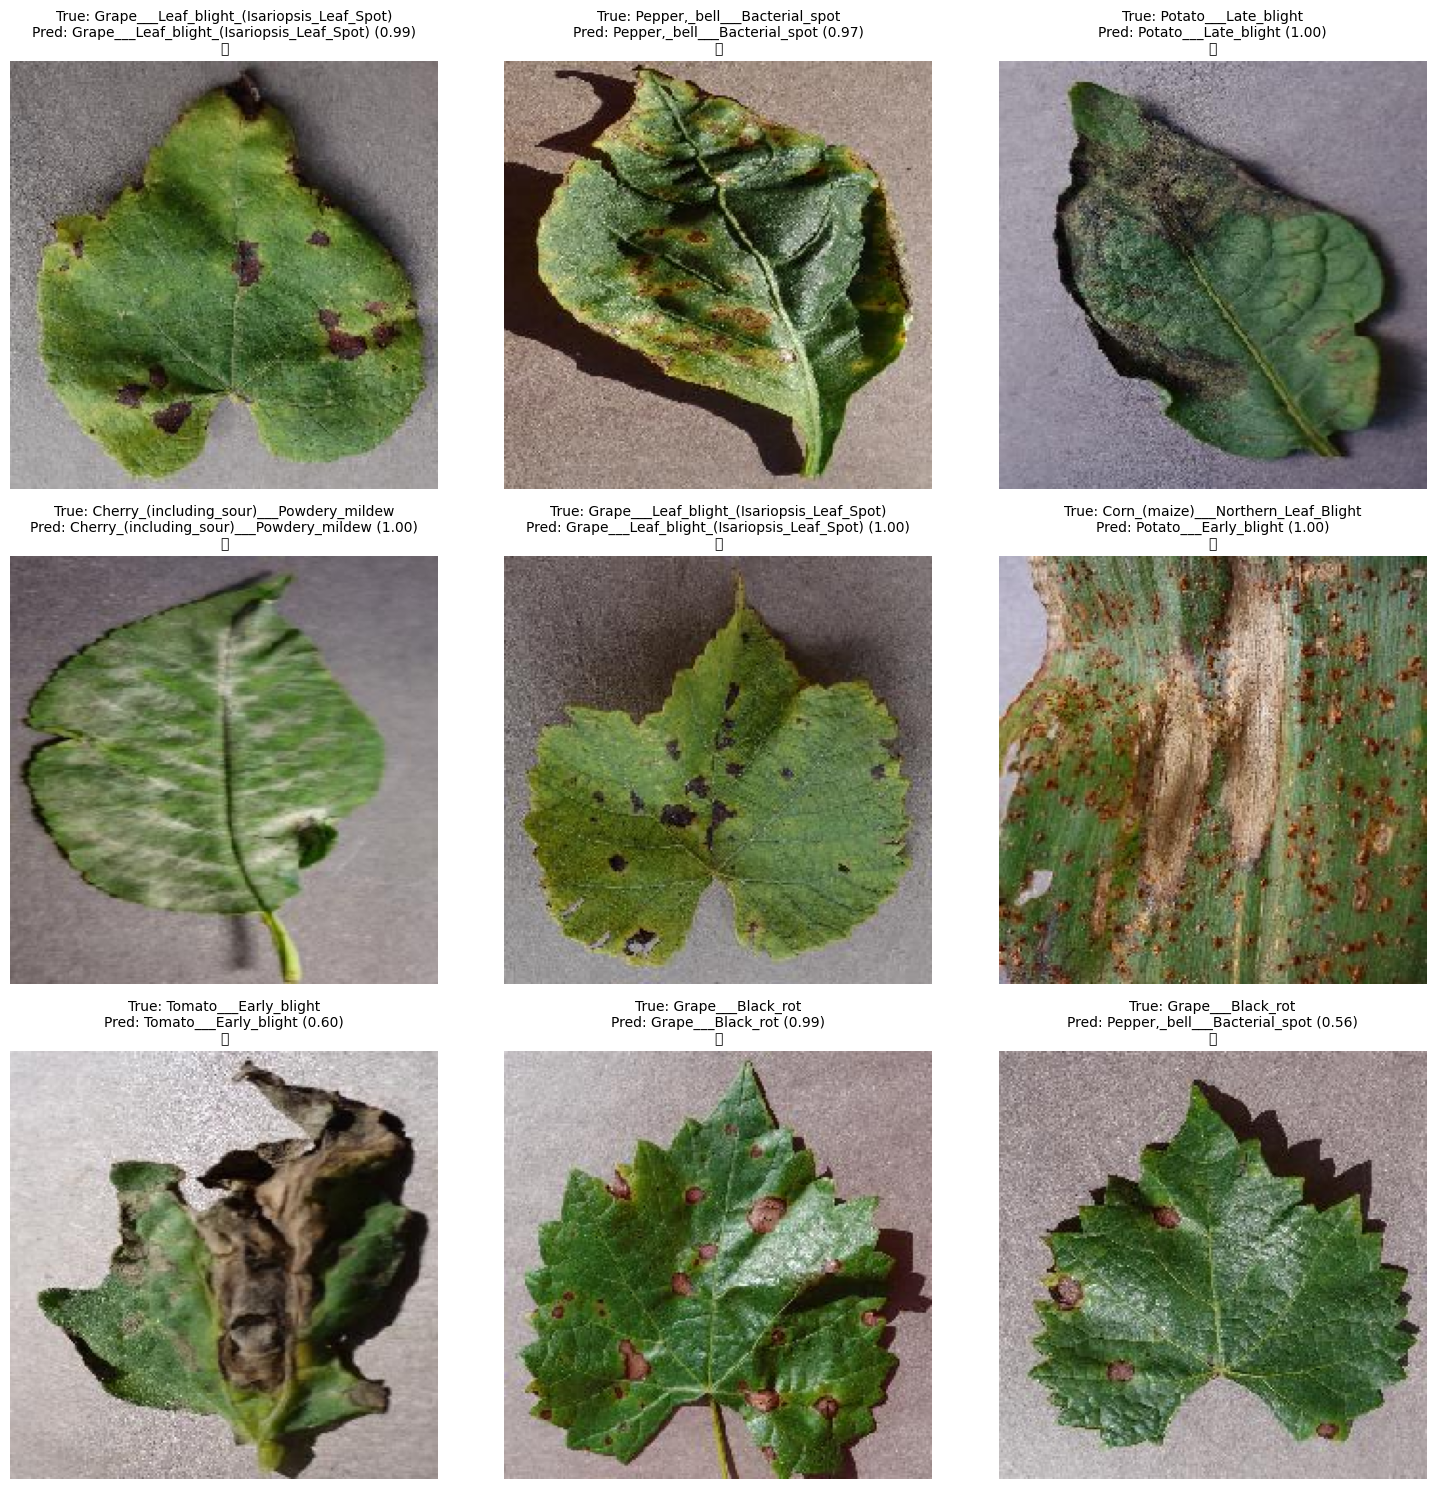


✅ Correct predictions: 7/9 | Accuracy: 77.78%


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define paths
val_dir = 'plantvillage_curated/val'
img_size = 224  # Your model's input size

# Get list of class names
class_names = sorted(os.listdir(val_dir))

# Randomly pick 9 images
samples = []
for _ in range(9):
    class_name = random.choice(class_names)
    class_path = os.path.join(val_dir, class_name)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    samples.append((img_path, class_name))

# Plot images and predictions
plt.figure(figsize=(15, 15))

correct = 0

for i, (img_path, true_class) in enumerate(samples):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)
    pred_idx = np.argmax(preds)
    pred_class = class_names[pred_idx]
    confidence = preds[0][pred_idx]

    # Check correctness
    is_correct = pred_class == true_class
    if is_correct:
        correct += 1

    # Plot
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"True: {true_class}\nPred: {pred_class} ({confidence:.2f})\n{'✅' if is_correct else '❌'}",
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Accuracy
print(f"\n✅ Correct predictions: {correct}/9 | Accuracy: {correct/9:.2%}")


🔍 Predicting...

📊 Classification Report:

                                            precision    recall  f1-score   support

  Cherry_(including_sour)___Powdery_mildew       1.00      0.90      0.95        10
               Corn_(maize)___Common_rust_       1.00      1.00      1.00        10
       Corn_(maize)___Northern_Leaf_Blight       1.00      0.90      0.95        10
                    Corn_(maize)___healthy       1.00      0.90      0.95        10
                         Grape___Black_rot       1.00      0.50      0.67        10
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      0.60      0.75        10
             Pepper,_bell___Bacterial_spot       0.69      0.90      0.78        10
                     Potato___Early_blight       0.62      1.00      0.77        10
                      Potato___Late_blight       0.53      0.90      0.67        10
                  Strawberry___Leaf_scorch       0.82      0.90      0.86        10
                     Tomato___Ea

<Figure size 1200x1200 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


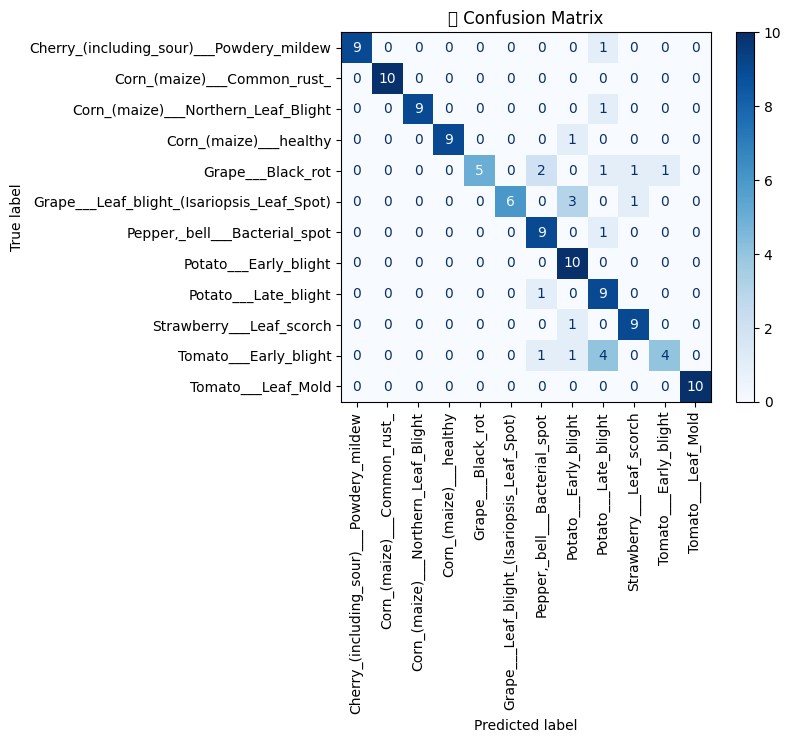

<ipython-input-30-041966581238>:66: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-041966581238>:66: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


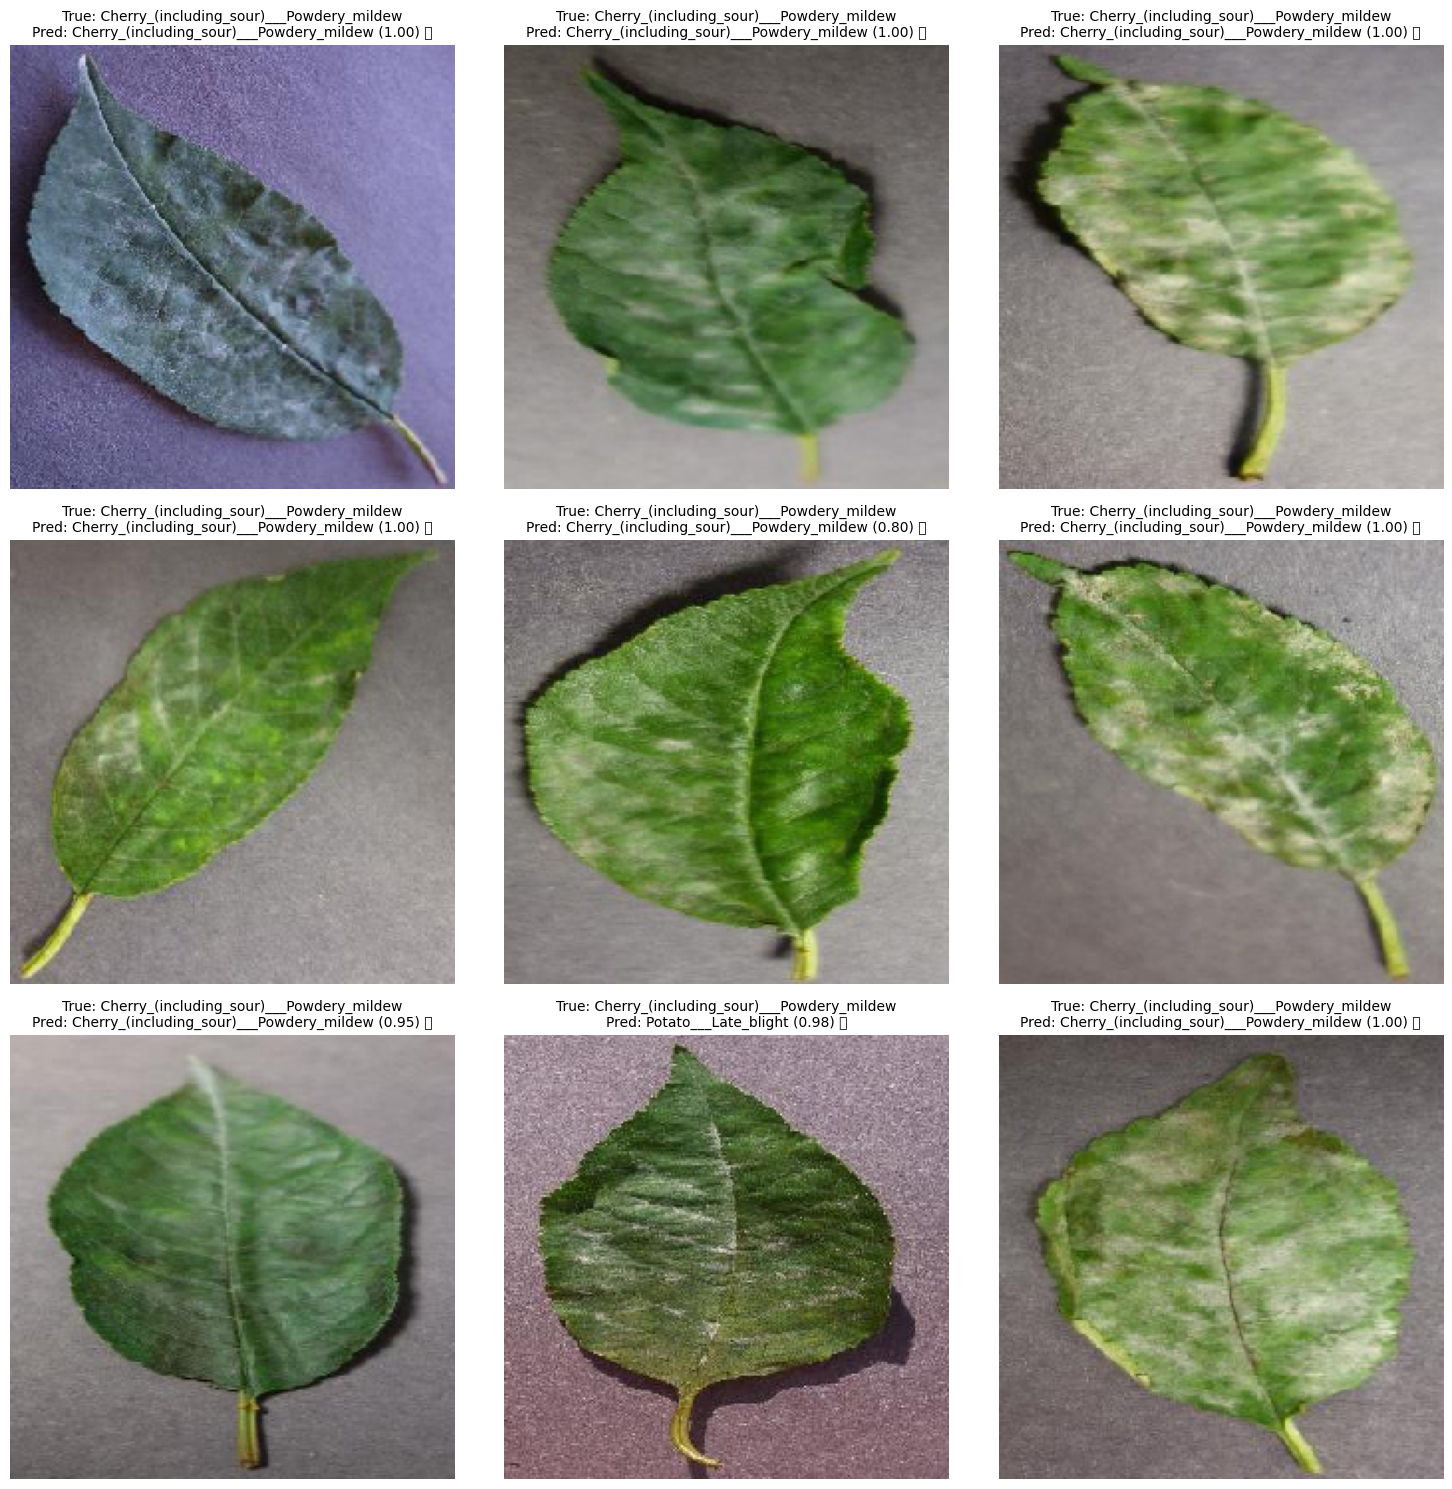

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Parameters
val_dir = 'plantvillage_curated/val'
img_size = 224
num_samples = 9  # for visual display

# Get class names
class_names = sorted(os.listdir(val_dir))

# Select images
all_samples = []
y_true = []
y_pred = []

print("🔍 Predicting...")

for class_name in class_names:
    class_path = os.path.join(val_dir, class_name)
    img_list = os.listdir(class_path)
    random.shuffle(img_list)
    for img_name in img_list[:10]:  # sample 10 per class for metrics (change as needed)
        img_path = os.path.join(class_path, img_name)

        # Load and preprocess
        img = image.load_img(img_path, target_size=(img_size, img_size))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        preds = model.predict(img_array, verbose=0)
        pred_idx = np.argmax(preds)
        true_idx = class_names.index(class_name)

        y_true.append(true_idx)
        y_pred.append(pred_idx)

        if len(all_samples) < num_samples:
            all_samples.append((img, class_name, class_names[pred_idx], preds[0][pred_idx]))

# 🎯 Classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 📉 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(12, 12))
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("📌 Confusion Matrix")
plt.show()

# 🎨 Display 9 random predictions
plt.figure(figsize=(15, 15))
for i, (img, true_class, pred_class, prob) in enumerate(all_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    correct = '✅' if true_class == pred_class else '❌'
    plt.title(f"True: {true_class}\nPred: {pred_class} ({prob:.2f}) {correct}", fontsize=10)
plt.tight_layout()
plt.show()

